<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/Taller2/detectorvallenatoVSreggaeton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Diseñe e implemente un detector de género musical, que permita diferenciar entre dos tipos de género. Para ello, construya una base de datos con al menos 50 registros por género musical, de 5 segundos cada uno, y luego implemente un código que permita recibir un nuevo registro músical de 5 segundos para detectar el género de la canción a partir de los vecinos más cercanos según la distancia Euclídea entre la magnitud del espectro de Fourier del nuevo registro (ver clasificador KNN), y las magnitudes de los espectros de la base de datos construida (Ver Cuaderno YouTube Download/Detector).***

In [9]:
#cargar datos desde drive acceso libre
#1qeGWWITbuC8N7KLpOxYusv6l1mY8QIP3
FILEID = "1qeGWWITbuC8N7KLpOxYusv6l1mY8QIP3" #"1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-11-07 20:08:58--  https://docs.google.com/uc?export=download&confirm=&id=1qeGWWITbuC8N7KLpOxYusv6l1mY8QIP3
Resolving docs.google.com (docs.google.com)... 108.177.11.113, 108.177.11.102, 108.177.11.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qeGWWITbuC8N7KLpOxYusv6l1mY8QIP3&export=download [following]
--2025-11-07 20:08:58--  https://drive.usercontent.google.com/download?id=1qeGWWITbuC8N7KLpOxYusv6l1mY8QIP3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12114 (12K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]  11.83K  --.-K

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

link  \
0         https://www.youtube.com/watch?v=FylpygEYYbE   
1         https://www.youtube.com/watch?v=NgvPFydKGpo   
2         https://www.youtube.com/watch?v=AVB_I-OF678   
3         https://www.youtube.com/watch?v=YiE4hzhDzCM   
4   https://www.youtube.com/watch?v=2Zqmp4XOxKs&li...   
5         https://www.youtube.com/watch?v=dEEjlrAdAMQ   
6         https://www.youtube.com/watch?v=-HFP9HnLFpA   
7         https://www.youtube.com/watch?v=vRBgZ4aMPio   
8         https://www.youtube.com/watch?v=f9PRHb-PLBw   
9         https://www.youtube.com/watch?v=lRWqYR3e7xE   
10        https://www.youtube.com/watch?v=LzAQb4rEIsw   
11        https://www.youtube.com/watch?v=xHUSS1wwaUo   
12        https://www.youtube.com/watch?v=CCF1_jI8Prk   
13        https://www.youtube.com/watch?v=yry3rgGlRUw   
14        https://www.youtube.com/watch?v=qB7RHM_xNcM   
15        https://www.youtube.com/watch?v=tz_LYpMtNRs   
16        https://www.youtube.com/watch?v=YIyiT96Ojqg   
17        https://www.youtube.com/watch?v=_JOnM3jmY0o   
18        https://www.youtube.com/watch?v=yYMEMTZp2QA   
19        https://www.youtube.com/watch?v=kQiBJcz2udA   
20        https://www.youtube.com/watch?v=FCmnci6e3Jg   
21        https://www.youtube.com/watch?v=KvjV6RMjfBo   
22        https://www.youtube.com/watch?v=HAgpeUuOGD4   
23        https://www.youtube.com/watch?v=fE93XNF0LSI   
24        https://www.youtube.com/watch?v=oD5f55ohsc4   
25        https://www.youtube.com/watch?v=EHDZv8-If-A   
26        https://www.youtube.com/watch?v=6pzZHroAaOs   
27        https://www.youtube.com/watch?v=lAITJiV8xbQ   
28        https://www.youtube.com/watch?v=DFw6O00SdZ0   
29        https://www.youtube.com/watch?v=ZYFtJzJEO1o   
30        https://www.youtube.com/watch?v=kBdo_4yFons   
31        https://www.youtube.com/watch?v=ZoVCM5iUaL0   
32        https://www.youtube.com/watch?v=JYwOQ2XQhlo   
33        https://www.youtube.com/watch?v=o44ExNZif5w   
34        https://www.youtube.com/watch?v=OjyBwm5PlXM   
35        https://www.youtube.com/watch?v=3onO-Panwkk   
36        https://www.youtube.com/watch?v=CtsEMU55AUI   
37        https://www.youtube.com/watch?v=zSMnGEuxB0U   
38        https://www.youtube.com/watch?v=fMiq-utP6SY   
39        https://www.youtube.com/watch?v=YAMm40WSrik   
40        https://www.youtube.com/watch?v=O-Tuaax4jfk   
41        https://www.youtube.com/watch?v=DiVJGn9mp20   
42        https://www.youtube.com/watch?v=ygvrgCH1pPg   
43        https://www.youtube.com/watch?v=2Or-Uxinbio   
44        https://www.youtube.com/watch?v=hSt_7vQAifY   
45        https://www.youtube.com/watch?v=pC4-qOy81MI   
46        https://www.youtube.com/watch?v=xPvdLTVHDds   
47        https://www.youtube.com/watch?v=hXP4bDjF2pk   
48        https://www.youtube.com/watch?v=PMCjXbQMZ6I   
49        https://www.youtube.com/watch?v=P982oehprfY   

                                                 band       type  type_num  
0                       Omar Geles & Esmeralda Orozco  Vallenato         1  
1         Kybba, Ryan Castro, Sean Paul & Busy Signal  Reggaeton         2  
2                        Los inquietos del valleanato  Vallenato         1  
3                                       los diablitos  Vallenato         1  
4                                       Los Diablitos  Vallenato         1  
5                                       Daddy Yankee   Reggaeton         2  
6                                      binomio de oro  Vallenato         1  
7                                            Don Omar  Reggaeton         2  
8                                       Polo Montañez  Vallenato         1  
9                                            Don Omar  Reggaeton         2  
10                                     Kaleth Morales  Vallenato         1  
11                                      Daddy Yankee   Reggaeton         2  
12                                      Daddy Yankee   Reggaeton         2  
13                         Binomio De Oro De América  Vallenat

In [11]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

# Paquete de carga de cookies para el control anti-bots captcha
!pip install browser-cookie3

import os
import yt_dlp as youtube_dl
import browser_cookie3

try:
    cookies = browser_cookie3.firefox()
except:
    print("No se pueden descargar cookies desde firefox. Intentando Chrome...")
    try:
        cookies = browser_cookie3.chrome()
    except:
        print("No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.")
        cookies = None

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':f'{name}.mp3',
    }
    if cookies:
        options['cookiefile'] = None
        options['cookiejar'] = cookies;

    with youtube_dl.YoutubeDL(options) as ydl:
        try:
            video_info = ydl.extract_info(video_url, download=False)
            ydl.download([video_info['webpage_url']])
            print("Download complete... {}".format(filename))
        except Exception as e:
            print(f"Error descargando {video_url}: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.10.22-py3-none-any.whl size=3022152 sha256=f83972ed5c9c98043bb8b57902c3227fb54050d93b11e376ab4bcbe8caf5d32d
  Stored in directory: /tmp/pip-ephem-wheel-cache-m5fy28ld/wheels/b6/70/13/8d2d11b326f983030b72df6408392d5c1b3bc27a9db8b7c5b0
Successfully built yt-dlp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
No se pueden descargar cookies desde firefox. Intentando Chrome...
No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.


In [13]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    try: # Added try block to catch download errors
        download_ytvid_as_mp3(X.loc[n,'link'],name_)
        #convertir a .wav
        subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                       name_+'.wav'])
    except youtube_dl.utils.DownloadError as e: # Catch the specific DownloadError
        print(f"Skipping video {X.loc[n,'link']} due to download error: {e}") # Print a message and skip

Carpeta results ya existe
video 1 de 50
link: https://www.youtube.com/watch?v=FylpygEYYbE

band: Omar Geles & Esmeralda Orozco

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=FylpygEYYbE
[youtube] FylpygEYYbE: Downloading webpage


[youtube] FylpygEYYbE: Downloading android sdkless player API JSON
[youtube] FylpygEYYbE: Downloading web safari player API JSON


[youtube] FylpygEYYbE: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=FylpygEYYbE
[youtube] FylpygEYYbE: Downloading webpage


[youtube] FylpygEYYbE: Downloading android sdkless player API JSON
[youtube] FylpygEYYbE: Downloading web safari player API JSON


[youtube] FylpygEYYbE: Downloading m3u8 information


[info] FylpygEYYbE: Downloading 1 format(s): 251
[download] results/Omar Geles & Esmeralda Orozco_0_1.mp3 has already been downloaded
[download] 100% of    4.86MiB
Error descargando https://www.youtube.com/watch?v=FylpygEYYbE: name 'filename' is not defined
video 2 de 50
link: https://www.youtube.com/watch?v=NgvPFydKGpo

band: Kybba, Ryan Castro, Sean Paul & Busy Signal

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=NgvPFydKGpo
[youtube] NgvPFydKGpo: Downloading webpage


[youtube] NgvPFydKGpo: Downloading android sdkless player API JSON
[youtube] NgvPFydKGpo: Downloading web safari player API JSON


[youtube] NgvPFydKGpo: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=NgvPFydKGpo
[youtube] NgvPFydKGpo: Downloading webpage


[youtube] NgvPFydKGpo: Downloading android sdkless player API JSON
[youtube] NgvPFydKGpo: Downloading web safari player API JSON


[youtube] NgvPFydKGpo: Downloading m3u8 information


[info] NgvPFydKGpo: Downloading 1 format(s): 251
[download] results/Kybba, Ryan Castro, Sean Paul & Busy Signal_1_2.mp3 has already been downloaded
[download] 100% of    2.47MiB
Error descargando https://www.youtube.com/watch?v=NgvPFydKGpo: name 'filename' is not defined
video 3 de 50
link: https://www.youtube.com/watch?v=AVB_I-OF678

band: Los inquietos del valleanato

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=AVB_I-OF678
[youtube] AVB_I-OF678: Downloading webpage


[youtube] AVB_I-OF678: Downloading android sdkless player API JSON
[youtube] AVB_I-OF678: Downloading web safari player API JSON


[youtube] AVB_I-OF678: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=AVB_I-OF678
[youtube] AVB_I-OF678: Downloading webpage


[youtube] AVB_I-OF678: Downloading android sdkless player API JSON
[youtube] AVB_I-OF678: Downloading web safari player API JSON


[youtube] AVB_I-OF678: Downloading m3u8 information


[info] AVB_I-OF678: Downloading 1 format(s): 251
[download] results/Los inquietos del valleanato_2_1.mp3 has already been downloaded
[download] 100% of    4.09MiB
Error descargando https://www.youtube.com/watch?v=AVB_I-OF678: name 'filename' is not defined
video 4 de 50
link: https://www.youtube.com/watch?v=YiE4hzhDzCM

band: los diablitos

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=YiE4hzhDzCM
[youtube] YiE4hzhDzCM: Downloading webpage


[youtube] YiE4hzhDzCM: Downloading android sdkless player API JSON
[youtube] YiE4hzhDzCM: Downloading web safari player API JSON


[youtube] YiE4hzhDzCM: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=YiE4hzhDzCM
[youtube] YiE4hzhDzCM: Downloading webpage


[youtube] YiE4hzhDzCM: Downloading android sdkless player API JSON
[youtube] YiE4hzhDzCM: Downloading web safari player API JSON


[youtube] YiE4hzhDzCM: Downloading m3u8 information


[info] YiE4hzhDzCM: Downloading 1 format(s): 251
[download] results/los diablitos_3_1.mp3 has already been downloaded
[download] 100% of    5.04MiB
Error descargando https://www.youtube.com/watch?v=YiE4hzhDzCM: name 'filename' is not defined
video 5 de 50
link: https://www.youtube.com/watch?v=2Zqmp4XOxKs&list=PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD

band: Los Diablitos

type: Vallenato

[youtube:tab] Extracting URL: https://www.youtube.com/watch?v=2Zqmp4XOxKs&list=PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD
[youtube:tab] Downloading playlist PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD - add --no-playlist to download just the video 2Zqmp4XOxKs
[youtube:tab] PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD: Downloading webpage
[youtube:tab] Extracting URL: https://www.youtube.com/playlist?list=PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD
[youtube:tab] PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD: Downloading webpage


[youtube:tab] PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: los diablitos del vallenato │vallenato romantico │ vallenatos viejos pero buenos
[youtube:tab] PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD page 1: Downloading API JSON
[youtube:tab] Playlist los diablitos del vallenato │vallenato romantico │ vallenatos viejos pero buenos: Downloading 75 items of 75
[download] Downloading item 1 of 75
[youtube] Extracting URL: https://www.youtube.com/watch?v=5L9itEadUCE
[youtube] 5L9itEadUCE: Downloading webpage


[youtube] 5L9itEadUCE: Downloading android sdkless player API JSON
[youtube] 5L9itEadUCE: Downloading web safari player API JSON


[youtube] 5L9itEadUCE: Downloading m3u8 information


[download] Downloading item 2 of 75
[youtube] Extracting URL: https://www.youtube.com/watch?v=cdRQtenZ33g
[youtube] cdRQtenZ33g: Downloading webpage


[youtube] cdRQtenZ33g: Downloading android sdkless player API JSON
[youtube] cdRQtenZ33g: Downloading web safari player API JSON


[youtube] cdRQtenZ33g: Downloading m3u8 information


[download] Downloading item 3 of 75
[youtube] Extracting URL: https://www.youtube.com/watch?v=qMT8EB_0d3M
[youtube] qMT8EB_0d3M: Downloading webpage


[youtube] qMT8EB_0d3M: Downloading android sdkless player API JSON
[youtube] qMT8EB_0d3M: Downloading web safari player API JSON


[youtube] qMT8EB_0d3M: Downloading m3u8 information


[download] Downloading item 4 of 75
[youtube] Extracting URL: https://www.youtube.com/watch?v=dfhMiGiRvys
[youtube] dfhMiGiRvys: Downloading webpage


[youtube] dfhMiGiRvys: Downloading android sdkless player API JSON
[youtube] dfhMiGiRvys: Downloading web safari player API JSON


[youtube] dfhMiGiRvys: Downloading m3u8 information


[download] Downloading item 5 of 75
[youtube] Extracting URL: https://www.youtube.com/watch?v=R_IyQWB2pk4
[youtube] R_IyQWB2pk4: Downloading webpage


[youtube] R_IyQWB2pk4: Downloading android sdkless player API JSON
[youtube] R_IyQWB2pk4: Downloading web safari player API JSON


ERROR: [youtube] R_IyQWB2pk4: Video unavailable. This video contains content from CODISCOS S.A.S. - Música, who has blocked it on copyright grounds


Error descargando https://www.youtube.com/watch?v=2Zqmp4XOxKs&list=PLJmzdqLGl_E7A3uzghsIQNN65WcqwYlXD: ERROR: [youtube] R_IyQWB2pk4: Video unavailable. This video contains content from CODISCOS S.A.S. - Música, who has blocked it on copyright grounds
video 6 de 50
link: https://www.youtube.com/watch?v=dEEjlrAdAMQ

band: Daddy Yankee 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=dEEjlrAdAMQ
[youtube] dEEjlrAdAMQ: Downloading webpage


[youtube] dEEjlrAdAMQ: Downloading android sdkless player API JSON
[youtube] dEEjlrAdAMQ: Downloading web safari player API JSON


[youtube] dEEjlrAdAMQ: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=dEEjlrAdAMQ
[youtube] dEEjlrAdAMQ: Downloading webpage


[youtube] dEEjlrAdAMQ: Downloading android sdkless player API JSON
[youtube] dEEjlrAdAMQ: Downloading web safari player API JSON


[youtube] dEEjlrAdAMQ: Downloading m3u8 information


[info] dEEjlrAdAMQ: Downloading 1 format(s): 251
[download] results/Daddy Yankee _5_2.mp3 has already been downloaded
[download] 100% of    3.37MiB
Error descargando https://www.youtube.com/watch?v=dEEjlrAdAMQ: name 'filename' is not defined
video 7 de 50
link: https://www.youtube.com/watch?v=-HFP9HnLFpA

band: binomio de oro

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=-HFP9HnLFpA
[youtube] -HFP9HnLFpA: Downloading webpage


[youtube] -HFP9HnLFpA: Downloading android sdkless player API JSON
[youtube] -HFP9HnLFpA: Downloading web safari player API JSON


[youtube] -HFP9HnLFpA: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=-HFP9HnLFpA
[youtube] -HFP9HnLFpA: Downloading webpage


[youtube] -HFP9HnLFpA: Downloading android sdkless player API JSON
[youtube] -HFP9HnLFpA: Downloading web safari player API JSON


[youtube] -HFP9HnLFpA: Downloading m3u8 information


[info] -HFP9HnLFpA: Downloading 1 format(s): 251
[download] results/binomio de oro_6_1.mp3 has already been downloaded
[download] 100% of    4.35MiB
Error descargando https://www.youtube.com/watch?v=-HFP9HnLFpA: name 'filename' is not defined
video 8 de 50
link: https://www.youtube.com/watch?v=vRBgZ4aMPio

band: Don Omar

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=vRBgZ4aMPio
[youtube] vRBgZ4aMPio: Downloading webpage


[youtube] vRBgZ4aMPio: Downloading android sdkless player API JSON
[youtube] vRBgZ4aMPio: Downloading web safari player API JSON


[youtube] vRBgZ4aMPio: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=vRBgZ4aMPio
[youtube] vRBgZ4aMPio: Downloading webpage


[youtube] vRBgZ4aMPio: Downloading android sdkless player API JSON
[youtube] vRBgZ4aMPio: Downloading web safari player API JSON


[youtube] vRBgZ4aMPio: Downloading m3u8 information


[info] vRBgZ4aMPio: Downloading 1 format(s): 251
[download] results/Don Omar_7_2.mp3 has already been downloaded
[download] 100% of    4.86MiB
Error descargando https://www.youtube.com/watch?v=vRBgZ4aMPio: name 'filename' is not defined
video 9 de 50
link: https://www.youtube.com/watch?v=f9PRHb-PLBw

band: Polo Montañez

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=f9PRHb-PLBw
[youtube] f9PRHb-PLBw: Downloading webpage


[youtube] f9PRHb-PLBw: Downloading android sdkless player API JSON
[youtube] f9PRHb-PLBw: Downloading web safari player API JSON


[youtube] f9PRHb-PLBw: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=f9PRHb-PLBw
[youtube] f9PRHb-PLBw: Downloading webpage


[youtube] f9PRHb-PLBw: Downloading android sdkless player API JSON
[youtube] f9PRHb-PLBw: Downloading web safari player API JSON


[youtube] f9PRHb-PLBw: Downloading m3u8 information


[info] f9PRHb-PLBw: Downloading 1 format(s): 251
[download] results/Polo Montañez_8_1.mp3 has already been downloaded
[download] 100% of    5.95MiB
Error descargando https://www.youtube.com/watch?v=f9PRHb-PLBw: name 'filename' is not defined
video 10 de 50
link: https://www.youtube.com/watch?v=lRWqYR3e7xE

band: Don Omar

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=lRWqYR3e7xE
[youtube] lRWqYR3e7xE: Downloading webpage


[youtube] lRWqYR3e7xE: Downloading android sdkless player API JSON
[youtube] lRWqYR3e7xE: Downloading web safari player API JSON


[youtube] lRWqYR3e7xE: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=lRWqYR3e7xE
[youtube] lRWqYR3e7xE: Downloading webpage


[youtube] lRWqYR3e7xE: Downloading android sdkless player API JSON
[youtube] lRWqYR3e7xE: Downloading web safari player API JSON


[youtube] lRWqYR3e7xE: Downloading m3u8 information


[info] lRWqYR3e7xE: Downloading 1 format(s): 251
[download] results/Don Omar_9_2.mp3 has already been downloaded
[download] 100% of    4.51MiB
Error descargando https://www.youtube.com/watch?v=lRWqYR3e7xE: name 'filename' is not defined
video 11 de 50
link: https://www.youtube.com/watch?v=LzAQb4rEIsw

band: Kaleth Morales

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=LzAQb4rEIsw
[youtube] LzAQb4rEIsw: Downloading webpage


[youtube] LzAQb4rEIsw: Downloading android sdkless player API JSON
[youtube] LzAQb4rEIsw: Downloading web safari player API JSON


[youtube] LzAQb4rEIsw: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=LzAQb4rEIsw
[youtube] LzAQb4rEIsw: Downloading webpage


[youtube] LzAQb4rEIsw: Downloading android sdkless player API JSON
[youtube] LzAQb4rEIsw: Downloading web safari player API JSON


[youtube] LzAQb4rEIsw: Downloading m3u8 information


[info] LzAQb4rEIsw: Downloading 1 format(s): 251
[download] results/Kaleth Morales_10_1.mp3 has already been downloaded
[download] 100% of    4.81MiB
Error descargando https://www.youtube.com/watch?v=LzAQb4rEIsw: name 'filename' is not defined
video 12 de 50
link: https://www.youtube.com/watch?v=xHUSS1wwaUo

band: Daddy Yankee 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=xHUSS1wwaUo
[youtube] xHUSS1wwaUo: Downloading webpage


[youtube] xHUSS1wwaUo: Downloading android sdkless player API JSON
[youtube] xHUSS1wwaUo: Downloading web safari player API JSON


[youtube] xHUSS1wwaUo: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=xHUSS1wwaUo
[youtube] xHUSS1wwaUo: Downloading webpage


[youtube] xHUSS1wwaUo: Downloading android sdkless player API JSON
[youtube] xHUSS1wwaUo: Downloading web safari player API JSON


[youtube] xHUSS1wwaUo: Downloading m3u8 information


[info] xHUSS1wwaUo: Downloading 1 format(s): 251
[download] results/Daddy Yankee _11_2.mp3 has already been downloaded
[download] 100% of    3.73MiB
Error descargando https://www.youtube.com/watch?v=xHUSS1wwaUo: name 'filename' is not defined
video 13 de 50
link: https://www.youtube.com/watch?v=CCF1_jI8Prk

band: Daddy Yankee 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=CCF1_jI8Prk
[youtube] CCF1_jI8Prk: Downloading webpage


[youtube] CCF1_jI8Prk: Downloading android sdkless player API JSON
[youtube] CCF1_jI8Prk: Downloading web safari player API JSON


[youtube] CCF1_jI8Prk: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=CCF1_jI8Prk
[youtube] CCF1_jI8Prk: Downloading webpage


[youtube] CCF1_jI8Prk: Downloading android sdkless player API JSON
[youtube] CCF1_jI8Prk: Downloading web safari player API JSON


[youtube] CCF1_jI8Prk: Downloading m3u8 information


[info] CCF1_jI8Prk: Downloading 1 format(s): 251
[download] results/Daddy Yankee _12_2.mp3 has already been downloaded
[download] 100% of    3.02MiB
Error descargando https://www.youtube.com/watch?v=CCF1_jI8Prk: name 'filename' is not defined
video 14 de 50
link: https://www.youtube.com/watch?v=yry3rgGlRUw

band:  Binomio De Oro De América

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=yry3rgGlRUw
[youtube] yry3rgGlRUw: Downloading webpage


[youtube] yry3rgGlRUw: Downloading android sdkless player API JSON
[youtube] yry3rgGlRUw: Downloading web safari player API JSON


[youtube] yry3rgGlRUw: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=yry3rgGlRUw
[youtube] yry3rgGlRUw: Downloading webpage


[youtube] yry3rgGlRUw: Downloading android sdkless player API JSON
[youtube] yry3rgGlRUw: Downloading web safari player API JSON


[youtube] yry3rgGlRUw: Downloading m3u8 information


[info] yry3rgGlRUw: Downloading 1 format(s): 251
[download] results/ Binomio De Oro De América_13_1.mp3 has already been downloaded
[download] 100% of    4.37MiB
Error descargando https://www.youtube.com/watch?v=yry3rgGlRUw: name 'filename' is not defined
video 15 de 50
link: https://www.youtube.com/watch?v=qB7RHM_xNcM

band: Patricia Teherán

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=qB7RHM_xNcM
[youtube] qB7RHM_xNcM: Downloading webpage


[youtube] qB7RHM_xNcM: Downloading android sdkless player API JSON
[youtube] qB7RHM_xNcM: Downloading web safari player API JSON


[youtube] qB7RHM_xNcM: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=qB7RHM_xNcM
[youtube] qB7RHM_xNcM: Downloading webpage


[youtube] qB7RHM_xNcM: Downloading android sdkless player API JSON
[youtube] qB7RHM_xNcM: Downloading web safari player API JSON


[youtube] qB7RHM_xNcM: Downloading m3u8 information


[info] qB7RHM_xNcM: Downloading 1 format(s): 251
[download] results/Patricia Teherán_14_1.mp3 has already been downloaded
[download] 100% of    5.03MiB
Error descargando https://www.youtube.com/watch?v=qB7RHM_xNcM: name 'filename' is not defined
video 16 de 50
link: https://www.youtube.com/watch?v=tz_LYpMtNRs

band: Patricia Teherán

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=tz_LYpMtNRs
[youtube] tz_LYpMtNRs: Downloading webpage


[youtube] tz_LYpMtNRs: Downloading android sdkless player API JSON
[youtube] tz_LYpMtNRs: Downloading web safari player API JSON


[youtube] tz_LYpMtNRs: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=tz_LYpMtNRs
[youtube] tz_LYpMtNRs: Downloading webpage


[youtube] tz_LYpMtNRs: Downloading android sdkless player API JSON
[youtube] tz_LYpMtNRs: Downloading web safari player API JSON


[youtube] tz_LYpMtNRs: Downloading m3u8 information


[info] tz_LYpMtNRs: Downloading 1 format(s): 251
[download] results/Patricia Teherán_15_1.mp3 has already been downloaded
[download] 100% of    4.25MiB
Error descargando https://www.youtube.com/watch?v=tz_LYpMtNRs: name 'filename' is not defined
video 17 de 50
link: https://www.youtube.com/watch?v=YIyiT96Ojqg

band: Tego Calderón

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=YIyiT96Ojqg
[youtube] YIyiT96Ojqg: Downloading webpage


[youtube] YIyiT96Ojqg: Downloading android sdkless player API JSON
[youtube] YIyiT96Ojqg: Downloading web safari player API JSON


[youtube] YIyiT96Ojqg: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=YIyiT96Ojqg
[youtube] YIyiT96Ojqg: Downloading webpage


[youtube] YIyiT96Ojqg: Downloading android sdkless player API JSON
[youtube] YIyiT96Ojqg: Downloading web safari player API JSON


[youtube] YIyiT96Ojqg: Downloading m3u8 information


[info] YIyiT96Ojqg: Downloading 1 format(s): 251
[download] results/Tego Calderón_16_2.mp3 has already been downloaded
[download] 100% of    6.54MiB
Error descargando https://www.youtube.com/watch?v=YIyiT96Ojqg: name 'filename' is not defined
video 18 de 50
link: https://www.youtube.com/watch?v=_JOnM3jmY0o

band: Ozuna

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=_JOnM3jmY0o
[youtube] _JOnM3jmY0o: Downloading webpage


[youtube] _JOnM3jmY0o: Downloading android sdkless player API JSON
[youtube] _JOnM3jmY0o: Downloading web safari player API JSON


[youtube] _JOnM3jmY0o: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=_JOnM3jmY0o
[youtube] _JOnM3jmY0o: Downloading webpage


[youtube] _JOnM3jmY0o: Downloading android sdkless player API JSON
[youtube] _JOnM3jmY0o: Downloading web safari player API JSON


[youtube] _JOnM3jmY0o: Downloading m3u8 information


[info] _JOnM3jmY0o: Downloading 1 format(s): 251
[download] results/Ozuna_17_2.mp3 has already been downloaded
[download] 100% of    3.44MiB
Error descargando https://www.youtube.com/watch?v=_JOnM3jmY0o: name 'filename' is not defined
video 19 de 50
link: https://www.youtube.com/watch?v=yYMEMTZp2QA

band: Don Omar

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=yYMEMTZp2QA
[youtube] yYMEMTZp2QA: Downloading webpage


[youtube] yYMEMTZp2QA: Downloading android sdkless player API JSON
[youtube] yYMEMTZp2QA: Downloading web safari player API JSON


[youtube] yYMEMTZp2QA: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=yYMEMTZp2QA
[youtube] yYMEMTZp2QA: Downloading webpage


[youtube] yYMEMTZp2QA: Downloading android sdkless player API JSON
[youtube] yYMEMTZp2QA: Downloading web safari player API JSON


[youtube] yYMEMTZp2QA: Downloading m3u8 information


[info] yYMEMTZp2QA: Downloading 1 format(s): 251
[download] results/Don Omar_18_2.mp3 has already been downloaded
[download] 100% of    3.53MiB
Error descargando https://www.youtube.com/watch?v=yYMEMTZp2QA: name 'filename' is not defined
video 20 de 50
link: https://www.youtube.com/watch?v=kQiBJcz2udA

band: Los Inquietos del Vallenato

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=kQiBJcz2udA
[youtube] kQiBJcz2udA: Downloading webpage


[youtube] kQiBJcz2udA: Downloading android sdkless player API JSON
[youtube] kQiBJcz2udA: Downloading web safari player API JSON


[youtube] kQiBJcz2udA: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=kQiBJcz2udA
[youtube] kQiBJcz2udA: Downloading webpage


[youtube] kQiBJcz2udA: Downloading android sdkless player API JSON
[youtube] kQiBJcz2udA: Downloading web safari player API JSON


[youtube] kQiBJcz2udA: Downloading m3u8 information


[info] kQiBJcz2udA: Downloading 1 format(s): 251
[download] results/Los Inquietos del Vallenato_19_1.mp3 has already been downloaded
[download] 100% of    5.46MiB
Error descargando https://www.youtube.com/watch?v=kQiBJcz2udA: name 'filename' is not defined
video 21 de 50
link: https://www.youtube.com/watch?v=FCmnci6e3Jg

band: Hector & Tito

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=FCmnci6e3Jg
[youtube] FCmnci6e3Jg: Downloading webpage


[youtube] FCmnci6e3Jg: Downloading android sdkless player API JSON
[youtube] FCmnci6e3Jg: Downloading web safari player API JSON


[youtube] FCmnci6e3Jg: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=FCmnci6e3Jg
[youtube] FCmnci6e3Jg: Downloading webpage


[youtube] FCmnci6e3Jg: Downloading android sdkless player API JSON
[youtube] FCmnci6e3Jg: Downloading web safari player API JSON


[youtube] FCmnci6e3Jg: Downloading m3u8 information


[info] FCmnci6e3Jg: Downloading 1 format(s): 251
[download] results/Hector & Tito_20_2.mp3 has already been downloaded
[download] 100% of    3.08MiB
Error descargando https://www.youtube.com/watch?v=FCmnci6e3Jg: name 'filename' is not defined
video 22 de 50
link: https://www.youtube.com/watch?v=KvjV6RMjfBo

band: Binomio De Oro De América

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=KvjV6RMjfBo
[youtube] KvjV6RMjfBo: Downloading webpage


[youtube] KvjV6RMjfBo: Downloading android sdkless player API JSON
[youtube] KvjV6RMjfBo: Downloading web safari player API JSON


[youtube] KvjV6RMjfBo: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=KvjV6RMjfBo
[youtube] KvjV6RMjfBo: Downloading webpage


[youtube] KvjV6RMjfBo: Downloading android sdkless player API JSON
[youtube] KvjV6RMjfBo: Downloading web safari player API JSON


[youtube] KvjV6RMjfBo: Downloading m3u8 information


[info] KvjV6RMjfBo: Downloading 1 format(s): 251
[download] results/Binomio De Oro De América_21_1.mp3 has already been downloaded
[download] 100% of    4.88MiB
Error descargando https://www.youtube.com/watch?v=KvjV6RMjfBo: name 'filename' is not defined
video 23 de 50
link: https://www.youtube.com/watch?v=HAgpeUuOGD4

band: Myke Towers

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=HAgpeUuOGD4
[youtube] HAgpeUuOGD4: Downloading webpage


[youtube] HAgpeUuOGD4: Downloading android sdkless player API JSON
[youtube] HAgpeUuOGD4: Downloading web safari player API JSON


[youtube] HAgpeUuOGD4: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=HAgpeUuOGD4
[youtube] HAgpeUuOGD4: Downloading webpage


[youtube] HAgpeUuOGD4: Downloading android sdkless player API JSON
[youtube] HAgpeUuOGD4: Downloading web safari player API JSON


[youtube] HAgpeUuOGD4: Downloading m3u8 information


[info] HAgpeUuOGD4: Downloading 1 format(s): 251
[download] results/Myke Towers_22_2.mp3 has already been downloaded
[download] 100% of    2.92MiB
Error descargando https://www.youtube.com/watch?v=HAgpeUuOGD4: name 'filename' is not defined
video 24 de 50
link: https://www.youtube.com/watch?v=fE93XNF0LSI

band:  El Gran Martín Elías Y Juancho De La Espriella 

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=fE93XNF0LSI
[youtube] fE93XNF0LSI: Downloading webpage


[youtube] fE93XNF0LSI: Downloading android sdkless player API JSON
[youtube] fE93XNF0LSI: Downloading web safari player API JSON


[youtube] fE93XNF0LSI: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=fE93XNF0LSI
[youtube] fE93XNF0LSI: Downloading webpage


[youtube] fE93XNF0LSI: Downloading android sdkless player API JSON
[youtube] fE93XNF0LSI: Downloading web safari player API JSON


[youtube] fE93XNF0LSI: Downloading m3u8 information


[info] fE93XNF0LSI: Downloading 1 format(s): 251
[download] results/ El Gran Martín Elías Y Juancho De La Espriella _23_1.mp3 has already been downloaded
[download] 100% of    5.19MiB
Error descargando https://www.youtube.com/watch?v=fE93XNF0LSI: name 'filename' is not defined
video 25 de 50
link: https://www.youtube.com/watch?v=oD5f55ohsc4

band: Feid

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4
[youtube] oD5f55ohsc4: Downloading webpage


[youtube] oD5f55ohsc4: Downloading android sdkless player API JSON
[youtube] oD5f55ohsc4: Downloading web safari player API JSON


[youtube] oD5f55ohsc4: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4
[youtube] oD5f55ohsc4: Downloading webpage


[youtube] oD5f55ohsc4: Downloading android sdkless player API JSON
[youtube] oD5f55ohsc4: Downloading web safari player API JSON


[youtube] oD5f55ohsc4: Downloading m3u8 information


[info] oD5f55ohsc4: Downloading 1 format(s): 251
[download] results/Feid_24_2.mp3 has already been downloaded
[download] 100% of    2.88MiB
Error descargando https://www.youtube.com/watch?v=oD5f55ohsc4: name 'filename' is not defined
video 26 de 50
link: https://www.youtube.com/watch?v=EHDZv8-If-A

band: Diomedes Díaz

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=EHDZv8-If-A
[youtube] EHDZv8-If-A: Downloading webpage


[youtube] EHDZv8-If-A: Downloading android sdkless player API JSON
[youtube] EHDZv8-If-A: Downloading web safari player API JSON


[youtube] EHDZv8-If-A: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=EHDZv8-If-A
[youtube] EHDZv8-If-A: Downloading webpage


[youtube] EHDZv8-If-A: Downloading android sdkless player API JSON
[youtube] EHDZv8-If-A: Downloading web safari player API JSON


[youtube] EHDZv8-If-A: Downloading m3u8 information


[info] EHDZv8-If-A: Downloading 1 format(s): 251
[download] results/Diomedes Díaz_25_1.mp3 has already been downloaded
[download] 100% of    4.59MiB
Error descargando https://www.youtube.com/watch?v=EHDZv8-If-A: name 'filename' is not defined
video 27 de 50
link: https://www.youtube.com/watch?v=6pzZHroAaOs

band: Karol G

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=6pzZHroAaOs
[youtube] 6pzZHroAaOs: Downloading webpage


[youtube] 6pzZHroAaOs: Downloading android sdkless player API JSON
[youtube] 6pzZHroAaOs: Downloading web safari player API JSON


[youtube] 6pzZHroAaOs: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=6pzZHroAaOs
[youtube] 6pzZHroAaOs: Downloading webpage


[youtube] 6pzZHroAaOs: Downloading android sdkless player API JSON
[youtube] 6pzZHroAaOs: Downloading web safari player API JSON


[youtube] 6pzZHroAaOs: Downloading m3u8 information


[info] 6pzZHroAaOs: Downloading 1 format(s): 251
[download] results/Karol G_26_2.mp3 has already been downloaded
[download] 100% of    2.95MiB
Error descargando https://www.youtube.com/watch?v=6pzZHroAaOs: name 'filename' is not defined
video 28 de 50
link: https://www.youtube.com/watch?v=lAITJiV8xbQ

band: Diomedes Díaz

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=lAITJiV8xbQ
[youtube] lAITJiV8xbQ: Downloading webpage


[youtube] lAITJiV8xbQ: Downloading android sdkless player API JSON
[youtube] lAITJiV8xbQ: Downloading web safari player API JSON


[youtube] lAITJiV8xbQ: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=lAITJiV8xbQ
[youtube] lAITJiV8xbQ: Downloading webpage


[youtube] lAITJiV8xbQ: Downloading android sdkless player API JSON
[youtube] lAITJiV8xbQ: Downloading web safari player API JSON


[youtube] lAITJiV8xbQ: Downloading m3u8 information


[info] lAITJiV8xbQ: Downloading 1 format(s): 251
[download] results/Diomedes Díaz_27_1.mp3 has already been downloaded
[download] 100% of    5.08MiB
Error descargando https://www.youtube.com/watch?v=lAITJiV8xbQ: name 'filename' is not defined
video 29 de 50
link: https://www.youtube.com/watch?v=DFw6O00SdZ0

band: Farruko y J Alvarez

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=DFw6O00SdZ0
[youtube] DFw6O00SdZ0: Downloading webpage


[youtube] DFw6O00SdZ0: Downloading android sdkless player API JSON
[youtube] DFw6O00SdZ0: Downloading web safari player API JSON


[youtube] DFw6O00SdZ0: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=DFw6O00SdZ0
[youtube] DFw6O00SdZ0: Downloading webpage


[youtube] DFw6O00SdZ0: Downloading android sdkless player API JSON
[youtube] DFw6O00SdZ0: Downloading web safari player API JSON


[youtube] DFw6O00SdZ0: Downloading m3u8 information


[info] DFw6O00SdZ0: Downloading 1 format(s): 251
[download] results/Farruko y J Alvarez_28_2.mp3 has already been downloaded
[download] 100% of    4.09MiB
Error descargando https://www.youtube.com/watch?v=DFw6O00SdZ0: name 'filename' is not defined
video 30 de 50
link: https://www.youtube.com/watch?v=ZYFtJzJEO1o

band: Jorge Celedón

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=ZYFtJzJEO1o
[youtube] ZYFtJzJEO1o: Downloading webpage


[youtube] ZYFtJzJEO1o: Downloading android sdkless player API JSON
[youtube] ZYFtJzJEO1o: Downloading web safari player API JSON


[youtube] ZYFtJzJEO1o: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=ZYFtJzJEO1o
[youtube] ZYFtJzJEO1o: Downloading webpage


[youtube] ZYFtJzJEO1o: Downloading android sdkless player API JSON
[youtube] ZYFtJzJEO1o: Downloading web safari player API JSON


[youtube] ZYFtJzJEO1o: Downloading m3u8 information


[info] ZYFtJzJEO1o: Downloading 1 format(s): 251
[download] results/Jorge Celedón_29_1.mp3 has already been downloaded
[download] 100% of    4.51MiB
Error descargando https://www.youtube.com/watch?v=ZYFtJzJEO1o: name 'filename' is not defined
video 31 de 50
link: https://www.youtube.com/watch?v=kBdo_4yFons

band: Plan B 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=kBdo_4yFons
[youtube] kBdo_4yFons: Downloading webpage


[youtube] kBdo_4yFons: Downloading android sdkless player API JSON
[youtube] kBdo_4yFons: Downloading web safari player API JSON


[youtube] kBdo_4yFons: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=kBdo_4yFons
[youtube] kBdo_4yFons: Downloading webpage


[youtube] kBdo_4yFons: Downloading android sdkless player API JSON
[youtube] kBdo_4yFons: Downloading web safari player API JSON


[youtube] kBdo_4yFons: Downloading m3u8 information


[info] kBdo_4yFons: Downloading 1 format(s): 251
[download] results/Plan B _30_2.mp3 has already been downloaded
[download] 100% of    3.13MiB
Error descargando https://www.youtube.com/watch?v=kBdo_4yFons: name 'filename' is not defined
video 32 de 50
link: https://www.youtube.com/watch?v=ZoVCM5iUaL0

band: Wisin & Yandel 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=ZoVCM5iUaL0
[youtube] ZoVCM5iUaL0: Downloading webpage


[youtube] ZoVCM5iUaL0: Downloading android sdkless player API JSON
[youtube] ZoVCM5iUaL0: Downloading web safari player API JSON


[youtube] ZoVCM5iUaL0: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=ZoVCM5iUaL0
[youtube] ZoVCM5iUaL0: Downloading webpage


[youtube] ZoVCM5iUaL0: Downloading android sdkless player API JSON
[youtube] ZoVCM5iUaL0: Downloading web safari player API JSON


[youtube] ZoVCM5iUaL0: Downloading m3u8 information


[info] ZoVCM5iUaL0: Downloading 1 format(s): 251
[download] results/Wisin & Yandel _31_2.mp3 has already been downloaded
[download] 100% of    3.71MiB
Error descargando https://www.youtube.com/watch?v=ZoVCM5iUaL0: name 'filename' is not defined
video 33 de 50
link: https://www.youtube.com/watch?v=JYwOQ2XQhlo

band: Luis Mateus y David Rendón

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=JYwOQ2XQhlo
[youtube] JYwOQ2XQhlo: Downloading webpage


[youtube] JYwOQ2XQhlo: Downloading android sdkless player API JSON
[youtube] JYwOQ2XQhlo: Downloading web safari player API JSON


[youtube] JYwOQ2XQhlo: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=JYwOQ2XQhlo
[youtube] JYwOQ2XQhlo: Downloading webpage


[youtube] JYwOQ2XQhlo: Downloading android sdkless player API JSON
[youtube] JYwOQ2XQhlo: Downloading web safari player API JSON


[youtube] JYwOQ2XQhlo: Downloading m3u8 information


[info] JYwOQ2XQhlo: Downloading 1 format(s): 251
[download] results/Luis Mateus y David Rendón_32_1.mp3 has already been downloaded
[download] 100% of    4.73MiB
Error descargando https://www.youtube.com/watch?v=JYwOQ2XQhlo: name 'filename' is not defined
video 34 de 50
link: https://www.youtube.com/watch?v=o44ExNZif5w

band: Los Inquietos del Vallento

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=o44ExNZif5w
[youtube] o44ExNZif5w: Downloading webpage


[youtube] o44ExNZif5w: Downloading android sdkless player API JSON
[youtube] o44ExNZif5w: Downloading web safari player API JSON


[youtube] o44ExNZif5w: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=o44ExNZif5w
[youtube] o44ExNZif5w: Downloading webpage


[youtube] o44ExNZif5w: Downloading android sdkless player API JSON
[youtube] o44ExNZif5w: Downloading web safari player API JSON


[youtube] o44ExNZif5w: Downloading m3u8 information


[info] o44ExNZif5w: Downloading 1 format(s): 251
[download] results/Los Inquietos del Vallento_33_1.mp3 has already been downloaded
[download] 100% of    3.53MiB
Error descargando https://www.youtube.com/watch?v=o44ExNZif5w: name 'filename' is not defined
video 35 de 50
link: https://www.youtube.com/watch?v=OjyBwm5PlXM

band: Alexis & Fido

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=OjyBwm5PlXM
[youtube] OjyBwm5PlXM: Downloading webpage


[youtube] OjyBwm5PlXM: Downloading android sdkless player API JSON
[youtube] OjyBwm5PlXM: Downloading web safari player API JSON


[youtube] OjyBwm5PlXM: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=OjyBwm5PlXM
[youtube] OjyBwm5PlXM: Downloading webpage


[youtube] OjyBwm5PlXM: Downloading android sdkless player API JSON
[youtube] OjyBwm5PlXM: Downloading web safari player API JSON


[youtube] OjyBwm5PlXM: Downloading m3u8 information


[info] OjyBwm5PlXM: Downloading 1 format(s): 251
[download] results/Alexis & Fido_34_2.mp3 has already been downloaded
[download] 100% of    2.99MiB
Error descargando https://www.youtube.com/watch?v=OjyBwm5PlXM: name 'filename' is not defined
video 36 de 50
link: https://www.youtube.com/watch?v=3onO-Panwkk

band: Plan B

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=3onO-Panwkk
[youtube] 3onO-Panwkk: Downloading webpage


[youtube] 3onO-Panwkk: Downloading android sdkless player API JSON
[youtube] 3onO-Panwkk: Downloading web safari player API JSON


[youtube] 3onO-Panwkk: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=3onO-Panwkk
[youtube] 3onO-Panwkk: Downloading webpage


[youtube] 3onO-Panwkk: Downloading android sdkless player API JSON
[youtube] 3onO-Panwkk: Downloading web safari player API JSON


[youtube] 3onO-Panwkk: Downloading m3u8 information


[info] 3onO-Panwkk: Downloading 1 format(s): 251
[download] results/Plan B_35_2.mp3 has already been downloaded
[download] 100% of    4.39MiB
Error descargando https://www.youtube.com/watch?v=3onO-Panwkk: name 'filename' is not defined
video 37 de 50
link: https://www.youtube.com/watch?v=CtsEMU55AUI

band: Jorge Celedón

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=CtsEMU55AUI
[youtube] CtsEMU55AUI: Downloading webpage


[youtube] CtsEMU55AUI: Downloading android sdkless player API JSON
[youtube] CtsEMU55AUI: Downloading web safari player API JSON


[youtube] CtsEMU55AUI: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=CtsEMU55AUI
[youtube] CtsEMU55AUI: Downloading webpage


[youtube] CtsEMU55AUI: Downloading android sdkless player API JSON
[youtube] CtsEMU55AUI: Downloading web safari player API JSON


[youtube] CtsEMU55AUI: Downloading m3u8 information


[info] CtsEMU55AUI: Downloading 1 format(s): 251
[download] results/Jorge Celedón_36_1.mp3 has already been downloaded
[download] 100% of    4.71MiB
Error descargando https://www.youtube.com/watch?v=CtsEMU55AUI: name 'filename' is not defined
video 38 de 50
link: https://www.youtube.com/watch?v=zSMnGEuxB0U

band: Arcángel 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=zSMnGEuxB0U
[youtube] zSMnGEuxB0U: Downloading webpage


[youtube] zSMnGEuxB0U: Downloading android sdkless player API JSON
[youtube] zSMnGEuxB0U: Downloading web safari player API JSON


[youtube] zSMnGEuxB0U: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=zSMnGEuxB0U
[youtube] zSMnGEuxB0U: Downloading webpage


[youtube] zSMnGEuxB0U: Downloading android sdkless player API JSON
[youtube] zSMnGEuxB0U: Downloading web safari player API JSON


[youtube] zSMnGEuxB0U: Downloading m3u8 information


[info] zSMnGEuxB0U: Downloading 1 format(s): 251
[download] results/Arcángel _37_2.mp3 has already been downloaded
[download] 100% of    3.74MiB
Error descargando https://www.youtube.com/watch?v=zSMnGEuxB0U: name 'filename' is not defined
video 39 de 50
link: https://www.youtube.com/watch?v=fMiq-utP6SY

band: J Alvarez

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=fMiq-utP6SY
[youtube] fMiq-utP6SY: Downloading webpage


[youtube] fMiq-utP6SY: Downloading android sdkless player API JSON
[youtube] fMiq-utP6SY: Downloading web safari player API JSON


[youtube] fMiq-utP6SY: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=fMiq-utP6SY
[youtube] fMiq-utP6SY: Downloading webpage


[youtube] fMiq-utP6SY: Downloading android sdkless player API JSON
[youtube] fMiq-utP6SY: Downloading web safari player API JSON


[youtube] fMiq-utP6SY: Downloading m3u8 information


[info] fMiq-utP6SY: Downloading 1 format(s): 251
[download] results/J Alvarez_38_2.mp3 has already been downloaded
[download] 100% of    4.28MiB
Error descargando https://www.youtube.com/watch?v=fMiq-utP6SY: name 'filename' is not defined
video 40 de 50
link: https://www.youtube.com/watch?v=YAMm40WSrik

band: Luis Mateus & David Rendón y La Nueva Generacion 

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=YAMm40WSrik
[youtube] YAMm40WSrik: Downloading webpage


[youtube] YAMm40WSrik: Downloading android sdkless player API JSON
[youtube] YAMm40WSrik: Downloading web safari player API JSON


[youtube] YAMm40WSrik: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=YAMm40WSrik
[youtube] YAMm40WSrik: Downloading webpage


[youtube] YAMm40WSrik: Downloading android sdkless player API JSON
[youtube] YAMm40WSrik: Downloading web safari player API JSON


[youtube] YAMm40WSrik: Downloading m3u8 information


[info] YAMm40WSrik: Downloading 1 format(s): 251
[download] results/Luis Mateus & David Rendón y La Nueva Generacion _39_1.mp3 has already been downloaded
[download] 100% of    3.44MiB
Error descargando https://www.youtube.com/watch?v=YAMm40WSrik: name 'filename' is not defined
video 41 de 50
link: https://www.youtube.com/watch?v=O-Tuaax4jfk

band: Wisin & Yandel

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=O-Tuaax4jfk
[youtube] O-Tuaax4jfk: Downloading webpage


[youtube] O-Tuaax4jfk: Downloading android sdkless player API JSON
[youtube] O-Tuaax4jfk: Downloading web safari player API JSON


[youtube] O-Tuaax4jfk: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=O-Tuaax4jfk
[youtube] O-Tuaax4jfk: Downloading webpage


[youtube] O-Tuaax4jfk: Downloading android sdkless player API JSON
[youtube] O-Tuaax4jfk: Downloading web safari player API JSON


[youtube] O-Tuaax4jfk: Downloading m3u8 information


[info] O-Tuaax4jfk: Downloading 1 format(s): 251
[download] results/Wisin & Yandel_40_2.mp3 has already been downloaded
[download] 100% of    2.40MiB
Error descargando https://www.youtube.com/watch?v=O-Tuaax4jfk: name 'filename' is not defined
video 42 de 50
link: https://www.youtube.com/watch?v=DiVJGn9mp20

band: Los Inquietos Del Vallenato

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=DiVJGn9mp20
[youtube] DiVJGn9mp20: Downloading webpage


[youtube] DiVJGn9mp20: Downloading android sdkless player API JSON
[youtube] DiVJGn9mp20: Downloading web safari player API JSON


[youtube] DiVJGn9mp20: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=DiVJGn9mp20
[youtube] DiVJGn9mp20: Downloading webpage


[youtube] DiVJGn9mp20: Downloading android sdkless player API JSON
[youtube] DiVJGn9mp20: Downloading web safari player API JSON


[youtube] DiVJGn9mp20: Downloading m3u8 information


[info] DiVJGn9mp20: Downloading 1 format(s): 251
[download] results/Los Inquietos Del Vallenato_41_1.mp3 has already been downloaded
[download] 100% of    5.04MiB
Error descargando https://www.youtube.com/watch?v=DiVJGn9mp20: name 'filename' is not defined
video 43 de 50
link: https://www.youtube.com/watch?v=ygvrgCH1pPg

band: Nicky Jam

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=ygvrgCH1pPg
[youtube] ygvrgCH1pPg: Downloading webpage


[youtube] ygvrgCH1pPg: Downloading android sdkless player API JSON
[youtube] ygvrgCH1pPg: Downloading web safari player API JSON


[youtube] ygvrgCH1pPg: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=ygvrgCH1pPg
[youtube] ygvrgCH1pPg: Downloading webpage


[youtube] ygvrgCH1pPg: Downloading android sdkless player API JSON
[youtube] ygvrgCH1pPg: Downloading web safari player API JSON


[youtube] ygvrgCH1pPg: Downloading m3u8 information


[info] ygvrgCH1pPg: Downloading 1 format(s): 251
[download] results/Nicky Jam_42_2.mp3 has already been downloaded
[download] 100% of    3.40MiB
Error descargando https://www.youtube.com/watch?v=ygvrgCH1pPg: name 'filename' is not defined
video 44 de 50
link: https://www.youtube.com/watch?v=2Or-Uxinbio

band: Los Diablitos 

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=2Or-Uxinbio
[youtube] 2Or-Uxinbio: Downloading webpage


[youtube] 2Or-Uxinbio: Downloading android sdkless player API JSON
[youtube] 2Or-Uxinbio: Downloading web safari player API JSON


[youtube] 2Or-Uxinbio: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=2Or-Uxinbio
[youtube] 2Or-Uxinbio: Downloading webpage


[youtube] 2Or-Uxinbio: Downloading android sdkless player API JSON
[youtube] 2Or-Uxinbio: Downloading web safari player API JSON


[youtube] 2Or-Uxinbio: Downloading m3u8 information


[info] 2Or-Uxinbio: Downloading 1 format(s): 251
[download] results/Los Diablitos _43_1.mp3 has already been downloaded
[download] 100% of    4.73MiB
Error descargando https://www.youtube.com/watch?v=2Or-Uxinbio: name 'filename' is not defined
video 45 de 50
link: https://www.youtube.com/watch?v=hSt_7vQAifY

band:  Los Chiches del Vallenato

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=hSt_7vQAifY
[youtube] hSt_7vQAifY: Downloading webpage


[youtube] hSt_7vQAifY: Downloading android sdkless player API JSON
[youtube] hSt_7vQAifY: Downloading web safari player API JSON


[youtube] hSt_7vQAifY: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=hSt_7vQAifY
[youtube] hSt_7vQAifY: Downloading webpage


[youtube] hSt_7vQAifY: Downloading android sdkless player API JSON
[youtube] hSt_7vQAifY: Downloading web safari player API JSON


[youtube] hSt_7vQAifY: Downloading m3u8 information


[info] hSt_7vQAifY: Downloading 1 format(s): 251
[download] results/ Los Chiches del Vallenato_44_1.mp3 has already been downloaded
[download] 100% of    4.54MiB
Error descargando https://www.youtube.com/watch?v=hSt_7vQAifY: name 'filename' is not defined
video 46 de 50
link: https://www.youtube.com/watch?v=pC4-qOy81MI

band: Blessd 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=pC4-qOy81MI
[youtube] pC4-qOy81MI: Downloading webpage


[youtube] pC4-qOy81MI: Downloading android sdkless player API JSON
[youtube] pC4-qOy81MI: Downloading web safari player API JSON


[youtube] pC4-qOy81MI: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=pC4-qOy81MI
[youtube] pC4-qOy81MI: Downloading webpage


[youtube] pC4-qOy81MI: Downloading android sdkless player API JSON
[youtube] pC4-qOy81MI: Downloading web safari player API JSON


[youtube] pC4-qOy81MI: Downloading m3u8 information


[info] pC4-qOy81MI: Downloading 1 format(s): 251
[download] results/Blessd _45_2.mp3 has already been downloaded
[download] 100% of    3.78MiB
Error descargando https://www.youtube.com/watch?v=pC4-qOy81MI: name 'filename' is not defined
video 47 de 50
link: https://www.youtube.com/watch?v=xPvdLTVHDds

band: Wolfine Ft Ñejo 

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=xPvdLTVHDds
[youtube] xPvdLTVHDds: Downloading webpage


[youtube] xPvdLTVHDds: Downloading android sdkless player API JSON
[youtube] xPvdLTVHDds: Downloading web safari player API JSON


[youtube] xPvdLTVHDds: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=xPvdLTVHDds
[youtube] xPvdLTVHDds: Downloading webpage


[youtube] xPvdLTVHDds: Downloading android sdkless player API JSON
[youtube] xPvdLTVHDds: Downloading web safari player API JSON


[youtube] xPvdLTVHDds: Downloading m3u8 information


[info] xPvdLTVHDds: Downloading 1 format(s): 251
[download] results/Wolfine Ft Ñejo _46_2.mp3 has already been downloaded
[download] 100% of    2.68MiB
Error descargando https://www.youtube.com/watch?v=xPvdLTVHDds: name 'filename' is not defined
video 48 de 50
link: https://www.youtube.com/watch?v=hXP4bDjF2pk

band: José Luis Carrascal

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=hXP4bDjF2pk
[youtube] hXP4bDjF2pk: Downloading webpage


[youtube] hXP4bDjF2pk: Downloading android sdkless player API JSON
[youtube] hXP4bDjF2pk: Downloading web safari player API JSON


[youtube] hXP4bDjF2pk: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=hXP4bDjF2pk
[youtube] hXP4bDjF2pk: Downloading webpage


[youtube] hXP4bDjF2pk: Downloading android sdkless player API JSON
[youtube] hXP4bDjF2pk: Downloading web safari player API JSON


[youtube] hXP4bDjF2pk: Downloading m3u8 information


[info] hXP4bDjF2pk: Downloading 1 format(s): 251
[download] results/José Luis Carrascal_47_1.mp3 has already been downloaded
[download] 100% of    5.11MiB
Error descargando https://www.youtube.com/watch?v=hXP4bDjF2pk: name 'filename' is not defined
video 49 de 50
link: https://www.youtube.com/watch?v=PMCjXbQMZ6I

band: Jorge Celedón

type: Vallenato

[youtube] Extracting URL: https://www.youtube.com/watch?v=PMCjXbQMZ6I
[youtube] PMCjXbQMZ6I: Downloading webpage


[youtube] PMCjXbQMZ6I: Downloading android sdkless player API JSON
[youtube] PMCjXbQMZ6I: Downloading web safari player API JSON


[youtube] PMCjXbQMZ6I: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=PMCjXbQMZ6I
[youtube] PMCjXbQMZ6I: Downloading webpage


[youtube] PMCjXbQMZ6I: Downloading android sdkless player API JSON
[youtube] PMCjXbQMZ6I: Downloading web safari player API JSON


[youtube] PMCjXbQMZ6I: Downloading m3u8 information


[info] PMCjXbQMZ6I: Downloading 1 format(s): 251
[download] results/Jorge Celedón_48_1.mp3 has already been downloaded
[download] 100% of    4.84MiB
Error descargando https://www.youtube.com/watch?v=PMCjXbQMZ6I: name 'filename' is not defined
video 50 de 50
link: https://www.youtube.com/watch?v=P982oehprfY

band: Mora y Bad Bunny

type: Reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=P982oehprfY
[youtube] P982oehprfY: Downloading webpage


[youtube] P982oehprfY: Downloading android sdkless player API JSON
[youtube] P982oehprfY: Downloading web safari player API JSON


[youtube] P982oehprfY: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=P982oehprfY
[youtube] P982oehprfY: Downloading webpage


[youtube] P982oehprfY: Downloading android sdkless player API JSON
[youtube] P982oehprfY: Downloading web safari player API JSON


[youtube] P982oehprfY: Downloading m3u8 information


[info] P982oehprfY: Downloading 1 format(s): 251
[download] results/Mora y Bad Bunny_49_2.mp3 has already been downloaded
[download] 100% of    4.66MiB
Error descargando https://www.youtube.com/watch?v=P982oehprfY: name 'filename' is not defined


In [14]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Los Inquietos del Vallenato_19_1.wav',
 'Los Inquietos Del Vallenato_41_1.wav',
 'Don Omar_7_2.wav',
 'José Luis Carrascal_47_1.wav',
 'Hector & Tito_20_2.wav',
 'J Alvarez_38_2.wav',
 'los diablitos_3_1.wav',
 'Wisin & Yandel _31_2.wav',
 'Omar Geles & Esmeralda Orozco_0_1.wav',
 'Don Omar_18_2.wav',
 '\xa0Binomio De Oro De América_13_1.wav',
 'Alexis & Fido_34_2.wav',
 'Diomedes Díaz_25_1.wav',
 'Diomedes Díaz_27_1.wav',
 'Binomio De Oro De América_21_1.wav',
 'Luis Mateus y David Rendón_32_1.wav',
 'Jorge Celedón_36_1.wav',
 '\xa0Los Chiches del Vallenato_44_1.wav',
 'Kaleth Morales_10_1.wav',
 'Polo Montañez_8_1.wav',
 'Luis Mateus & David Rendón y La Nueva Generacion\xa0_39_1.wav',
 'Daddy Yankee\xa0_12_2.wav',
 '\xa0El Gran Martín Elías Y Juancho De La Espriella\xa0_23_1.wav',
 'Jorge Celedón_29_1.wav',
 'Feid_24_2.wav',
 'Plan B\xa0_30_2.wav',
 'Arcángel\xa0_37_2.wav',
 'Patricia Teherán_15_1.wav',
 'Plan B_35_2.wav',
 'Nicky Jam_42_2.wav',
 'Mora y Bad Bunny_49_2.wav',
 'Do

In [15]:
import soundfile as sf # para instalar pip install soundfile
from scipy.signal import resample_poly
import numpy as np
import os

#leer archivos y crear np.array audios
fs = 48000
tl = np.array([30,40,50,60,70,80]) #puntos lectura
ts = 5 #t segmento
# The total number of samples for each segment at the target fs
segment_length_fs = int(ts * fs)
Ns = len(wav_files)*len(tl) #cantidad segmentos
# x_t should be initialized with the shape corresponding to the target fs
x_t = np.zeros((Ns, segment_length_fs, 2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
type_c = X['type'].unique()
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs_i = sf.read(path+name)
    # Ensure x is at least 2D (for stereo)

    if x.ndim == 1:
        x = np.expand_dims(x, axis=1) # Add a channel dimension if mono
    if x.shape[1] == 1: # If still mono after expand_dims
        x = np.repeat(x, 2, axis=1) # Convert mono to stereo by repeating the channel

    # Check if the audio file has enough data for the requested segments
    if len(x) < int(fs_i * (tl[-1] + ts)):
        print(f"Warning: File {name} is too short for all requested segments. Skipping some segments.")
        valid_tl = tl[tl + ts <= len(x)/fs_i]
    else:
        valid_tl = tl

    for ti in valid_tl: #segmentos de tiempo
        print(name,'x',x.shape,'fs actual:',fs_i)

        # Slice based on the original sampling rate fs_i
        start_sample = int(fs_i * ti)
        end_sample = int(fs_i * (ti + ts))
        xc = x[start_sample:end_sample, :]

        # Check if the sliced segment has enough data for resampling
        # This can happen if the calculated end_sample exceeds the actual audio length
        if xc.shape[0] < int(ts * fs_i):
            print(f"Warning: Segment from {ti}s to {ti+ts}s in {name} is shorter than expected. Skipping.")
            continue # Skip this segment

        if fs_i != fs:
            # Resample using resample_poly
            # The output length of resample_poly is len(xc) * up / down
            # We want the resampled length to be exactly segment_length_fs
            # So we need to calculate up and down such that len(xc) * up / down = segment_length_fs
            # Or simply use the desired number of samples directly if supported by resample_poly
            # resample_poly can take 'nyq' or 'kaiser_beta' arguments for filter design,
            # but for simple resampling to a target number of points, a direct approach is needed.
            # A simpler resample function might be better, or calculate up/down differently.

            # Let's use a method that targets the desired number of samples directly.
            # scipy.signal.resample can do this, but it uses FFT and might not be ideal.
            # Let's adjust the resampling calculation with resample_poly to ensure the correct output size.
            # Target output size is segment_length_fs.
            # Current size is xc.shape[0].
            # We want xc.shape[0] * (up / down) = segment_length_fs
            # Let's find up and down that approximate fs/fs_i
            # A more robust way is to use a library that handles resampling to a specific length.
            # For now, let's ensure the resampled array is truncated or padded if necessary,
            # although it's better to get the resampling right.

            # A common approach for arbitrary resampling is
            # import librosa
            # xc_resampled = librosa.resample(xc, orig_sr=fs_i, target_sr=fs)
            # However, this outputs a 1D array for mono. Need to handle stereo.

            # Let's stick with resample_poly but ensure the output is the correct size.
            # If resampling makes it slightly longer or shorter, we'll handle it.
            gcd_val = np.gcd(fs, fs_i)
            up_val = fs // gcd_val
            down_val = fs_i // gcd_val

            # Resample each channel separately
            xc_resampled_ch1 = resample_poly(xc[:, 0], up=up_val, down=down_val)
            xc_resampled_ch2 = resample_poly(xc[:, 1], up=up_val, down=down_val)

            # Combine channels
            xc_resampled = np.stack((xc_resampled_ch1, xc_resampled_ch2), axis=-1)

            # Ensure the resampled segment has the target length (segment_length_fs)
            if xc_resampled.shape[0] > segment_length_fs:
                xc_resampled = xc_resampled[:segment_length_fs, :]
            elif xc_resampled.shape[0] < segment_length_fs:
                # Pad with zeros if shorter
                padding = np.zeros((segment_length_fs - xc_resampled.shape[0], 2))
                xc_resampled = np.vstack((xc_resampled, padding))

            xc = xc_resampled # Use the resampled array
            print(f"Resampled to shape: {xc.shape}")

        # Now xc should have the shape (segment_length_fs, 2) which is (240000, 2)
        if xc.shape[0] != segment_length_fs:
             print(f"Error: Resampled segment has incorrect length {xc.shape[0]}. Expected {segment_length_fs}. Skipping.")
             continue # Skip this segment if resampling failed to produce correct length


        x_t[i] = xc
        # The label indexing seems to assume the order of wav_files matches the order in X
        # and the type_num is the last digit before '.wav' and is 1 or 2.
        # This might be fragile. Consider using the 'type_num' column from X directly
        # based on the filename or a mapping.
        # For now, sticking to the original logic for the label.
        try:
             # Extract type_num from the filename
             parts = name.split('_')
             type_num_str = parts[-1].split('.')[0]
             label[i] = int(type_num_str)
        except (IndexError, ValueError):
             print(f"Warning: Could not extract type_num from filename {name}. Setting label to 0.")
             label[i] = 0 # Assign a default or error label

        # The name_c logic also seems to assume the filename format.
        # Sticking to original logic.
        name_c += [name[:-4]] # Remove '.wav' from the end


        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")
        i+=1

# After the loop, if some segments were skipped, the actual number of populated segments in x_t and label
# might be less than Ns. We should truncate these arrays to the actual number of populated segments.
# Ns was calculated based on the initial assumption of processing all segments.
# Let's re-calculate the effective Ns (number of processed segments).
effective_Ns = i
x_t = x_t[:effective_Ns]
label = label[:effective_Ns]
name_c = name_c[:effective_Ns]

x_t.shape

Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
0 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 30:35; tipo música: Vallenato
Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
1 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 40:45; tipo música: Vallenato
Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
2 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 50:55; tipo música: Vallenato
Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
3 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 60:65; tipo música: Vallenato
Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
4 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 70:75; tipo música: Vallenato
Los Inquietos del Vallenato_19_1.wav x (15335759, 2) fs actual: 48000
5 lectura: Los Inquietos del Vallenato_19_1.wav; segundo 80:85; tipo música: Vallenato
Los Inquietos Del Vallenato_41_1.wav x (14276372, 2) fs ac

/tmp/ipython-input-2722154239.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")


8 lectura: Los Inquietos Del Vallenato_41_1.wav; segundo 50:55; tipo música: Vallenato
Los Inquietos Del Vallenato_41_1.wav x (14276372, 2) fs actual: 48000
9 lectura: Los Inquietos Del Vallenato_41_1.wav; segundo 60:65; tipo música: Vallenato
Los Inquietos Del Vallenato_41_1.wav x (14276372, 2) fs actual: 48000
10 lectura: Los Inquietos Del Vallenato_41_1.wav; segundo 70:75; tipo música: Vallenato
Los Inquietos Del Vallenato_41_1.wav x (14276372, 2) fs actual: 48000
11 lectura: Los Inquietos Del Vallenato_41_1.wav; segundo 80:85; tipo música: Vallenato
Don Omar_7_2.wav x (15011840, 2) fs actual: 48000
12 lectura: Don Omar_7_2.wav; segundo 30:35; tipo música: Reggaeton
Don Omar_7_2.wav x (15011840, 2) fs actual: 48000
13 lectura: Don Omar_7_2.wav; segundo 40:45; tipo música: Reggaeton
Don Omar_7_2.wav x (15011840, 2) fs actual: 48000
14 lectura: Don Omar_7_2.wav; segundo 50:55; tipo música: Reggaeton
Don Omar_7_2.wav x (15011840, 2) fs actual: 48000
15 lectura: Don Omar_7_2.wav; segund

(294, 240000, 2)

In [16]:
from IPython.display import Audio #reproducir segmento
i = 0
Audio(x_t[i].T,rate=fs)

In [17]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(294, 120001)

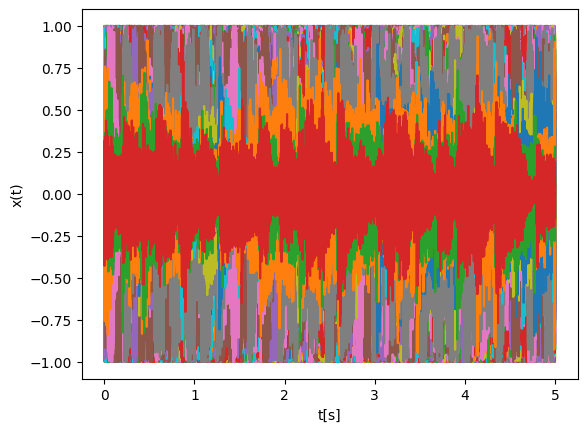

In [18]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

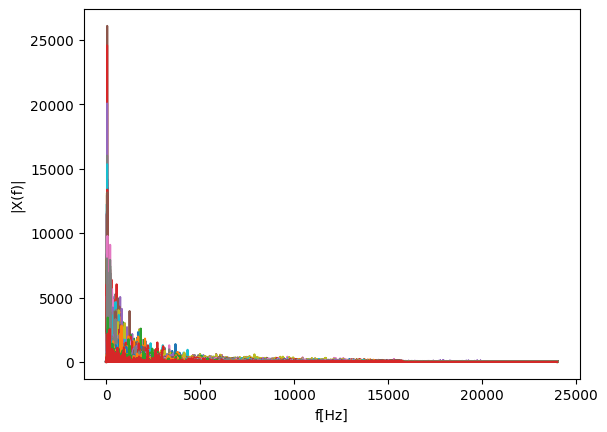

In [19]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

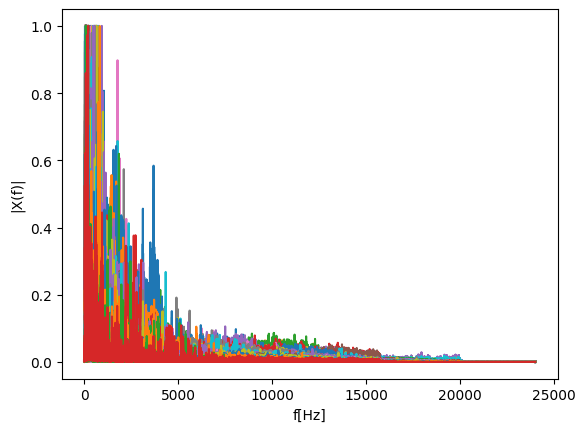

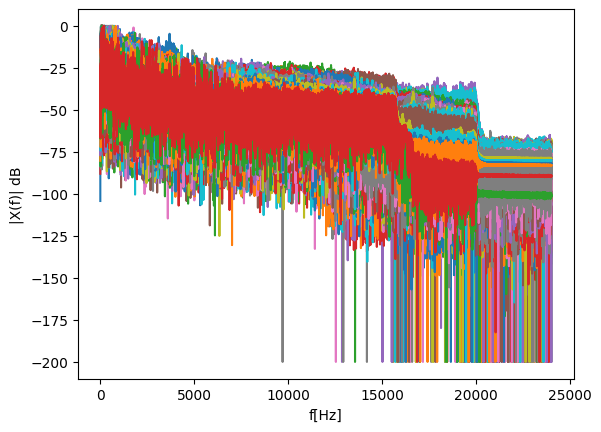

In [22]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

#Visualización de los datos en 2D

In [23]:
from umap import UMAP
#visualización de datos
n_neighbors = int(2*np.sqrt(Xw_.shape[0]))
sca_ = MinMaxScaler()

red_ = UMAP(n_components=2,n_neighbors=n_neighbors)
X_2D = sca_.fit_transform(red_.fit_transform(Xw_))

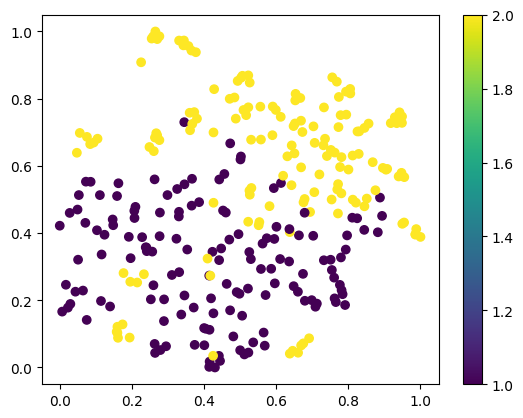

/tmp/ipython-input-2468643273.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


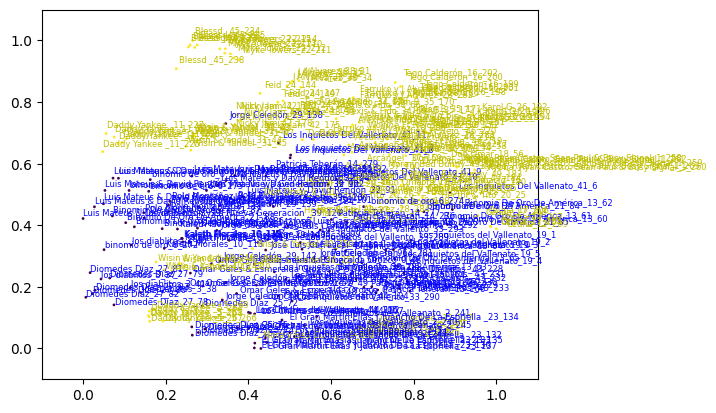

In [24]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [30]:
#reproducir audio
i = 1
Audio(x_t[i].T,rate=fs)

Predicción del género musical sobre espectro de Fourier

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador RandomForest
model = KNeighborsClassifier(n_neighbors=5)

# Realizar la validación cruzada
# Xw_ son tus características y label son tus etiquetas
# cv define el número folds para la validación cruzada
scores = cross_val_score(model, Xw_, label.ravel(), cv=5,scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Acierto para cada Fold:", scores)
print("Acierto promedio:", scores.mean())
print("Desviación estándar del Acierto:", scores.std())

#entrenar modelo para predecir nuevas canciones
model.fit(Xw_, label.ravel())

Acierto para cada Fold: [0.81355932 0.69491525 0.91525424 0.86440678 0.5862069 ]
Acierto promedio: 0.7748684979544126
Desviación estándar del Acierto: 0.11933814192613676


KNeighborsClassifier()

In [38]:
import joblib
#guardar modelo
try:
  os.mkdir('modelo')
except:
  print("Carpeta modelo ya existe")

filename_ = 'modelo/reggaeton_vs_vallenato'
model_ ={'Xw_':Xw_, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs, 'modelo':model,'type':X['type'].unique()}
joblib.dump(model_,filename_+".pkl")


Carpeta modelo ya existe


['modelo/reggaeton_vs_vallenato.pkl']

In [39]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para una nueva canción
---



In [67]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'label', 'name_c', 'vf', 'fs', 'modelo', 'type'])

In [69]:
from IPython.display import Audio

def preview_and_predict_idx(i):
    # 1) reproducir los 5 s del segmento i
    display(Audio(x_t[i].T, rate=fs))


    # 2) #evaluar para un segmento en fft normalizado
    pred = my_model_loaded['modelo'].predict(my_model_loaded['Xw_'][i].reshape(1,-1))[0]
    y_true = int(my_model_loaded['label'][i][0])

    print("Segmento:", my_model_loaded['name_c'][i])
    print("Etiqueta estimada:", my_model_loaded['type'][int(pred-1)])
    print("Etiqueta original:", my_model_loaded['type'][int(y_true-1)])

# Ejemplo: escuchar y luego ver el género
print("🎧")
preview_and_predict_idx(20)


🎧


Segmento: José Luis Carrascal_47_1
Etiqueta estimada: Vallenato
Etiqueta original: Vallenato


PARA OTRA CANCION

In [68]:
from IPython.display import Audio

def preview_and_predict_idx(i):
    # Reproducir los 5 segundos
    display(Audio(x_t[i].T, rate=fs))

    # Predecir género
    pred = my_model_loaded['modelo'].predict(my_model_loaded['Xw_'][i].reshape(1,-1))[0]
    y_true = int(my_model_loaded['label'][i][0])

    print("Segmento:", my_model_loaded['name_c'][i])
    print("Etiqueta estimada:", my_model_loaded['type'][int(pred-1)])
    print("Etiqueta original:", my_model_loaded['type'][int(y_true-1)])


print("🎧")
preview_and_predict_idx(17)



🎧


Segmento: Don Omar_7_2
Etiqueta estimada: Reggaeton
Etiqueta original: Reggaeton
